<a href="https://colab.research.google.com/github/chera-mihiretu/ML_Path/blob/google_colab/ModelTraining1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_tran = x_train.astype('float32') / 255.0
x_text = x_test.astype('float32') / 255.0


# converting the
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


# converting the label into bit
y_train_bin = to_categorical(y_train, num_classes=10)  # Convert labels to one-hot encoding
y_test_bin = to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model = models.Sequential()


model.add(layers.Conv2D(32, (3,3),activation='relu', input_shape=(28,28,1)))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:

batch_size = 256
epochs = 10
history = model.fit(x_train, y_train_bin,
                    batch_size=batch_size,epochs=epochs,
                    validation_data = (x_test, y_test_bin))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 47s 194ms/step - accuracy: 0.7454 - loss: 5.3348 - val_accuracy: 0.9736 - val_loss: 0.0903
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 198ms/step - accuracy: 0.9770 - loss: 0.0758 - val_accuracy: 0.9761 - val_loss: 0.0727
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 189ms/step - accuracy: 0.9864 - loss: 0.0435 - val_accuracy: 0.9811 - val_loss: 0.0625
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 45s 192ms/step - accuracy: 0.9897 - loss: 0.0307 - val_accuracy: 0.9829 - val_loss: 0.0557
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 198ms/step - accuracy: 0.9921 - loss: 0.0238 - val_accuracy: 0.9846 - val_loss: 0.0524
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 189ms/step - accuracy: 0.9934 - loss: 0.0188 - val_accuracy: 0.9846 - val_loss: 0.0597
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 181ms/step - accuracy: 0.9944 - loss: 0.0168 - val_accuracy: 0.9841 - val_loss: 0.0621
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 84s 192ms/step - accuracy: 0.9944 - loss: 0

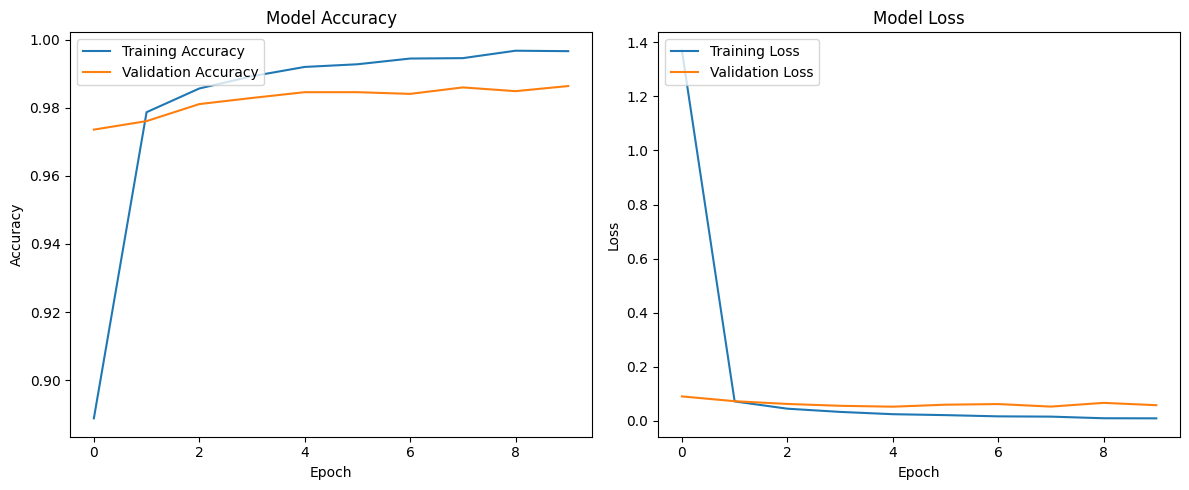

In [6]:
# Step 3: Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [8]:
model.save('digit_recognition_model.h5')

In [9]:
train_accuracy = history.history['accuracy'][-1] * 100
val_accuracy = history.history['val_accuracy'][-1] * 100
print(f'Training Accuracy: {train_accuracy:.2f}%')
print(f'Validation Accuracy: {val_accuracy:.2f}%')

Training Accuracy: 99.66%
Validation Accuracy: 98.64%


fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
